![figure 5.3](assets/5.5_example_5.4.png)

![figure 5.3](assets/5.5_figure_5.3.png)

In [13]:
import random

def get_random_card():
    return random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10])

def calculate_hand_value(cards):
    """Calculate the best value of a hand, handling aces properly"""
    total = sum(cards)
    aces = cards.count(1)
    
    # Convert aces from 1 to 11 if it doesn't bust and improves the hand
    while total <= 11 and aces > 0:
        total += 10  # Convert one ace from 1 to 11
        aces -= 1
    
    return total

def has_usable_ace(cards):
    """Check if hand has a usable ace (ace counted as 11)"""
    total = sum(cards)
    aces = cards.count(1)
    
    # If we have aces and total + 10 <= 21, then we have a usable ace
    return aces > 0 and total + 10 <= 21

# player sticks if sum is 20 or 21, hits otherwise
def player_target_policy(player_cards):
    hand_value = calculate_hand_value(player_cards)
    if hand_value >= 20:
        return 0  # stick
    else:
        return 1  # hit

def player_behavior_policy(player_cards):
    hand_value = calculate_hand_value(player_cards)
    if hand_value >= 21:
        return 0
    else:
        return random.choice([0, 1])

def dealer_policy(dealer_cards):
    hand_value = calculate_hand_value(dealer_cards)
    if hand_value >= 17:
        return 0  # stick
    else:
        return 1  # hit

def player_target_probability(player_cards, action):
    hand_value = calculate_hand_value(player_cards)
    if hand_value >= 20:
        if action == 0:
            return 1
        else:
            return 0
    else:
        if action == 0:
            return 0
        else:
            return 1

def player_behavior_probability(player_cards, action):
    hand_value = calculate_hand_value(player_cards)
    if hand_value >= 21:
        if action == 0:
            return 1
        else:
            return 0
    else:
        return .5

In [14]:
ITERATIONS = 10_000
RUNS = 100

In [15]:
state_returns = []
for i in range(10_000_000):
    player_cards = [1, 2]
    dealer_cards = [2]

    # Player's turn
    while True:
        player_action = player_target_policy(player_cards)
        if player_action == 0:  # stick
            break
        else:  # hit
            player_cards.append(get_random_card())

    # Dealer's turn 
    while True:
        dealer_action = dealer_policy(dealer_cards)
        if dealer_action == 0:  # stick
            break
        else:  # hit
            dealer_cards.append(get_random_card())
          
    # Determine winner and reward
    player_value = calculate_hand_value(player_cards)
    dealer_value = calculate_hand_value(dealer_cards)
    
    if player_value > 21:
        reward = -1  # player busts
    elif dealer_value > 21:
        reward = 1   # dealer busts
    elif player_value > dealer_value:
        reward = 1   # player wins
    elif player_value < dealer_value:
        reward = -1  # dealer wins
    else:
        reward = 0   # tie
    
    state_returns.append(reward)

REAL_VALUE = sum(state_returns) / len(state_returns)
print(REAL_VALUE)

-0.2773085


In [16]:
average_reg_is_mses = [0.0] * ITERATIONS
for j in range(RUNS):
    state_returns = []
    state_return_sum = 0
    for i in range(ITERATIONS):
        player_cards = [1, 2]
        dealer_cards = [2]

        # Player's turn
        target_probability = 1
        behavior_probability = 1
        while True:
            player_action = player_behavior_policy(player_cards)
            target_probability *= player_target_probability(player_cards, player_action)
            behavior_probability *= player_behavior_probability(player_cards, player_action)

            if player_action == 0:  # stick
                break
            else:  # hit
                player_cards.append(get_random_card())


        # Dealer's turn 
        while True:
            dealer_action = dealer_policy(dealer_cards)
            if dealer_action == 0:  # stick
                break
            else:  # hit
                dealer_cards.append(get_random_card())
            
        # Determine winner and reward
        player_value = calculate_hand_value(player_cards)
        dealer_value = calculate_hand_value(dealer_cards)
        
        if player_value > 21:
            reward = -1  # player busts
        elif dealer_value > 21:
            reward = 1   # dealer busts
        elif player_value > dealer_value:
            reward = 1   # player wins
        elif player_value < dealer_value:
            reward = -1  # dealer wins
        else:
            reward = 0   # tie
        
        importance_ratio = target_probability / (behavior_probability)
        adjusted_reward = importance_ratio * reward

        state_returns.append(adjusted_reward)
        state_return_sum += adjusted_reward

        avg_cum_state_return = state_return_sum / (i + 1)

        average_reg_is_mses[i] += (avg_cum_state_return - (REAL_VALUE))**2 / RUNS


    average_return = state_return_sum / len(state_returns)
    print(average_return)

-0.2766
-0.2688
-0.2128
-0.2742
-0.279
-0.3074
-0.2464
-0.2612
-0.3014
-0.2848
-0.2556
-0.26
-0.296
-0.2364
-0.2994
-0.2734
-0.2422
-0.297
-0.2756
-0.2908
-0.288
-0.2304
-0.3028
-0.2636
-0.2712
-0.2494
-0.3026
-0.2848
-0.3042
-0.2638
-0.2756
-0.2194
-0.316
-0.275
-0.3488
-0.1934
-0.2794
-0.2154
-0.278
-0.2686
-0.288
-0.2606
-0.3188
-0.2826
-0.2502
-0.2572
-0.2504
-0.294
-0.3222
-0.3024
-0.2724
-0.292
-0.2998
-0.2656
-0.311
-0.2636
-0.2612
-0.2668
-0.2702
-0.3522
-0.2852
-0.266
-0.3492
-0.2786
-0.2402
-0.2756
-0.2602
-0.2978
-0.2348
-0.275
-0.2696
-0.272
-0.2378
-0.3084
-0.2746
-0.2882
-0.231
-0.2948
-0.2892
-0.319
-0.2866
-0.3146
-0.2742
-0.277
-0.2536
-0.2718
-0.3368
-0.3348
-0.2906
-0.2642
-0.2874
-0.2442
-0.3024
-0.3164
-0.2586
-0.3008
-0.3028
-0.2842
-0.2602
-0.342


In [17]:
average_weighted_is_mses = [0.0] * ITERATIONS

for j in range(RUNS):
    state_returns = []
    state_return_sum = 0
    importance_ratio_sum = 0
    for i in range(ITERATIONS):
        player_cards = [1, 2]
        dealer_cards = [2]

        # Player's turn
        target_probability = 1
        behavior_probability = 1
        while True:
            player_action = player_behavior_policy(player_cards)
            target_probability *= player_target_probability(player_cards, player_action)
            behavior_probability *= player_behavior_probability(player_cards, player_action)

            if player_action == 0:  # stick
                break
            else:  # hit
                player_cards.append(get_random_card())


        # Dealer's turn 
        while True:
            dealer_action = dealer_policy(dealer_cards)
            if dealer_action == 0:  # stick
                break
            else:  # hit
                dealer_cards.append(get_random_card())
            
        # Determine winner and reward
        player_value = calculate_hand_value(player_cards)
        dealer_value = calculate_hand_value(dealer_cards)
        
        if player_value > 21:
            reward = -1  # player busts
        elif dealer_value > 21:
            reward = 1   # dealer busts
        elif player_value > dealer_value:
            reward = 1   # player wins
        elif player_value < dealer_value:
            reward = -1  # dealer wins
        else:
            reward = 0   # tie
        
        importance_ratio = target_probability / (behavior_probability)
        adjusted_reward = importance_ratio * reward

        state_returns.append(adjusted_reward)
        state_return_sum += adjusted_reward
        importance_ratio_sum += importance_ratio

        if importance_ratio_sum == 0:
            avg_cum_state_return = 0
        else:
            avg_cum_state_return = state_return_sum / importance_ratio_sum

        average_weighted_is_mses[i] += (avg_cum_state_return - (REAL_VALUE))**2 / RUNS


    average_return = state_return_sum / importance_ratio_sum
    print(average_return)

-0.26337840411350216
-0.23293650793650794
-0.24989890820865346
-0.22457365933840148
-0.3095285857572718
-0.2627118644067797
-0.29101866251944014
-0.28448979591836737
-0.25084745762711863
-0.2940438871473354
-0.26506777893639205
-0.25644146885778046
-0.34270469936384157
-0.23571287324500692
-0.27788244159758857
-0.3095380923815237
-0.27770411062701267
-0.30074257425742573
-0.28378378378378377
-0.2489560548816862
-0.31332007952286284
-0.2597456743798207
-0.27943352356795603
-0.2867446393762183
-0.2984783456886461
-0.31301715438950556
-0.31303520456707895
-0.32809871003925967
-0.29763533320304864
-0.2895516492198301
-0.3205713152152351
-0.2910086333965045
-0.3338866984851629
-0.35235580828594637
-0.29850448654037887
-0.25963904840032814
-0.23614609571788414
-0.2824458392387123
-0.3074707125024006
-0.27424749163879597
-0.26541397533763944
-0.2983499616270146
-0.2898775986011269
-0.22871246400658166
-0.31101132370167905
-0.28225478225478223
-0.28503089495714573
-0.27386786904528526
-0.26520

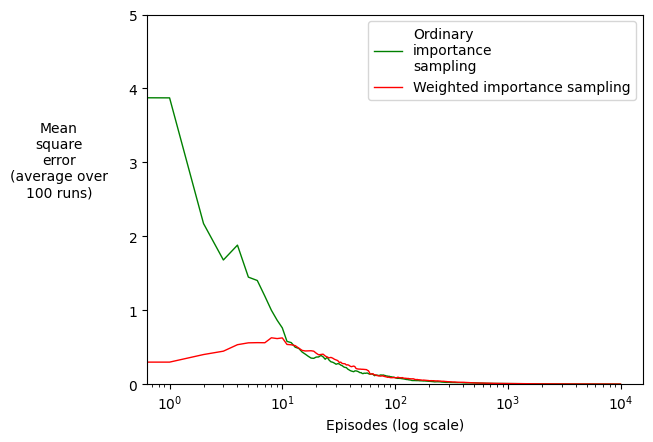

In [18]:
import matplotlib.pyplot as plt

plt.semilogx(average_reg_is_mses, color='green', linewidth=1, label='Ordinary\nimportance\nsampling')
plt.semilogx(average_weighted_is_mses, color='red', linewidth=1, label='Weighted importance sampling')

plt.xlabel('Episodes (log scale)')
plt.ylabel('Mean\nsquare\nerror\n(average over\n100 runs)', rotation=0, labelpad=50)
plt.legend(loc='upper right')
plt.ylim(0, 5)

plt.show()